In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F

In [2]:
class Model(nn.Module):
    
    def __init__(self,in_features=4,h1=8,h2=9,out_features=3):
        # how many layers?
        # Input layer (4 features) --> h1 N --> h2 N --> output (3 classes)

        super().__init__()
        self.fc1 = nn.Linear(in_features,h1)
        self.fc2 = nn.Linear(h1,h2)
        self.out = nn.Linear(h2,out_features)
            
    def forward(self,x):
        # forward propagation
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.out(x)
        
        return x

In [4]:
torch.manual_seed(32)
model = Model()

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

In [8]:
df = pd.read_csv('/Users/n1r7/Desktop/pytorch/PYTORCH_NOTEBOOKS/Data/iris.csv')

In [9]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


In [10]:
df.tail()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
145,6.7,3.0,5.2,2.3,2.0
146,6.3,2.5,5.0,1.9,2.0
147,6.5,3.0,5.2,2.0,2.0
148,6.2,3.4,5.4,2.3,2.0
149,5.9,3.0,5.1,1.8,2.0


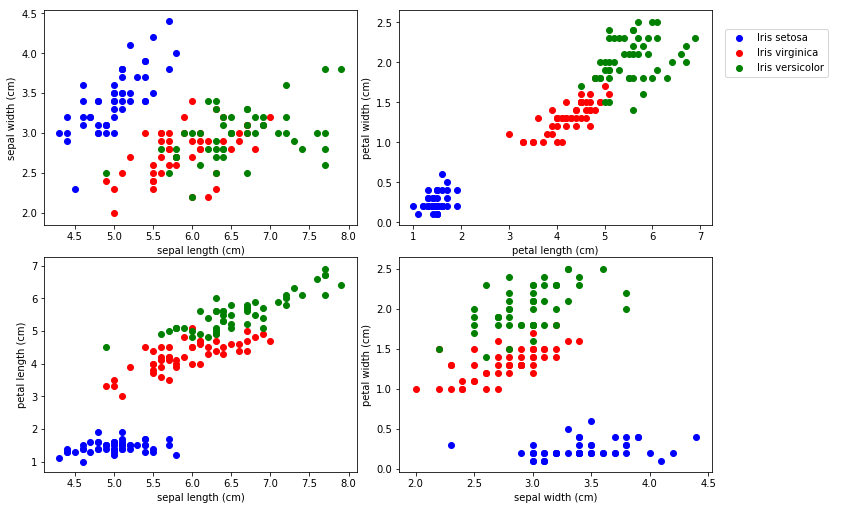

In [11]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10,7))
fig.tight_layout()

plots = [(0,1),(2,3),(0,2),(1,3)]
colors = ['b', 'r', 'g']
labels = ['Iris setosa','Iris virginica','Iris versicolor']

for i, ax in enumerate(axes.flat):
    for j in range(3):
        x = df.columns[plots[i][0]]
        y = df.columns[plots[i][1]]
        ax.scatter(df[df['target']==j][x], df[df['target']==j][y], color=colors[j])
        ax.set(xlabel=x, ylabel=y)

fig.legend(labels=labels, loc=3, bbox_to_anchor=(1.0,0.85))
plt.show()

In [12]:
X = df.drop('target',axis=1).values
y = df['target'].values

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=33)

In [16]:
X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)

In [17]:
y_train = torch.LongTensor(y_train)
y_test = torch.LongTensor(y_test)

In [18]:
criterion = nn.CrossEntropyLoss() # how we are going to measure our error aka how far off predictions are from data

optimizer = torch.optim.Adam(model.parameters(),lr=0.01)

In [19]:
model.parameters()

<generator object Module.parameters at 0x1a2c8cacf0>

In [20]:
model.parameters

<bound method Module.parameters of Model(
  (fc1): Linear(in_features=4, out_features=8, bias=True)
  (fc2): Linear(in_features=8, out_features=9, bias=True)
  (out): Linear(in_features=9, out_features=3, bias=True)
)>

In [22]:
# EPOCHS ? 

epochs = 100
losses = []

for i in range(epochs):
    
    # Forward and get a prediction
    y_pred = model.forward(X_train)
    
    # calculate loss/error
    loss = criterion(y_pred,y_train)
    
    losses.append(loss)
    
    if i%10==0:
        print(f'Epoch {i} and loss is: {loss}')
    
    # Backpropagation
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

Epoch 0 and loss is: 1.1507115364074707
Epoch 10 and loss is: 0.9377316832542419
Epoch 20 and loss is: 0.7798274755477905
Epoch 30 and loss is: 0.6099672317504883
Epoch 40 and loss is: 0.4008353650569916
Epoch 50 and loss is: 0.2543700337409973
Epoch 60 and loss is: 0.15052451193332672
Epoch 70 and loss is: 0.10086153447628021
Epoch 80 and loss is: 0.08127658814191818
Epoch 90 and loss is: 0.07230933755636215


Text(0.5, 0, 'Epoch')

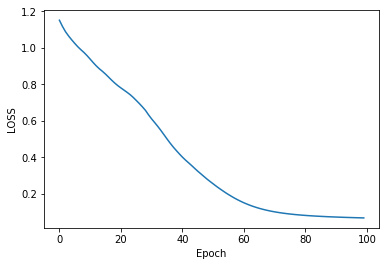

In [23]:
plt.plot(range(epochs),losses)
plt.ylabel('LOSS')
plt.xlabel('Epoch')

In [24]:
with torch.no_grad():
    y_eval = model.forward(X_test)
    loss = criterion(y_eval,y_test)

In [25]:
loss

tensor(0.0581)

In [32]:
correct = 0

with torch.no_grad():
    
    for i,data in enumerate(X_test):
        
        y_val = model.forward(data)
        
        print(f'{i+1}.)   {str(y_val)}   {y_test[i]}')
        
        if y_val.argmax().item() == y_test[i]:
            correct +=1

print(f'We got {correct} correct!')

1.)   tensor([-2.1245,  4.8073, -0.8623])   1
2.)   tensor([-1.7976,  5.3110, -1.5445])   1
3.)   tensor([  6.3540,   0.8432, -10.0531])   0
4.)   tensor([-3.9114,  4.5969,  1.1698])   1
5.)   tensor([-7.4707,  3.2028,  5.7865])   2
6.)   tensor([-10.4965,   1.6465,   9.6306])   2
7.)   tensor([  6.3199,   0.9912, -10.1520])   0
8.)   tensor([  7.0467,   0.7053, -10.9127])   0
9.)   tensor([-7.2053,  3.3485,  5.3575])   2
10.)   tensor([-9.3950,  2.5767,  8.1044])   2
11.)   tensor([-9.8795,  2.3483,  8.7148])   2
12.)   tensor([ 6.2747,  0.6650, -9.7604])   0
13.)   tensor([-9.3131,  2.1888,  8.1954])   2
14.)   tensor([-3.7796,  4.5061,  1.0759])   1
15.)   tensor([-7.8646,  3.0127,  6.2310])   2
16.)   tensor([-1.8859,  5.1583, -1.3341])   1
17.)   tensor([-5.6999,  3.5039,  3.6704])   2
18.)   tensor([  7.1788,   0.7363, -11.1340])   0
19.)   tensor([-3.2937,  4.7942,  0.3480])   1
20.)   tensor([-7.7657,  3.7639,  5.7106])   2
21.)   tensor([  6.6498,   0.7883, -10.4241])   0
22.)

In [33]:
torch.save(model.state_dict(),'my_iris_model.pt')

In [39]:
new_model = Model() # ?? W or B
new_model.load_state_dict(torch.load('my_iris_model.pt'))

IncompatibleKeys(missing_keys=[], unexpected_keys=[])

In [41]:
new_model.eval()

Model(
  (fc1): Linear(in_features=4, out_features=8, bias=True)
  (fc2): Linear(in_features=8, out_features=9, bias=True)
  (out): Linear(in_features=9, out_features=3, bias=True)
)

In [42]:
mystery_iris = torch.tensor([5.6,3.7,2.2,0.5])

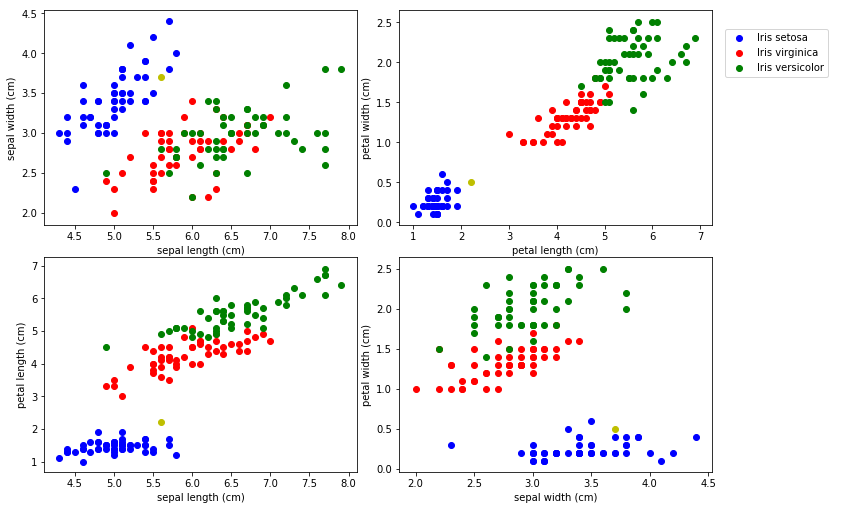

In [43]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10,7))
fig.tight_layout()

plots = [(0,1),(2,3),(0,2),(1,3)]
colors = ['b', 'r', 'g']
labels = ['Iris setosa','Iris virginica','Iris versicolor']

for i, ax in enumerate(axes.flat):
    for j in range(3):
        x = df.columns[plots[i][0]]
        y = df.columns[plots[i][1]]
        ax.scatter(df[df['target']==j][x], df[df['target']==j][y], color=colors[j])
        ax.set(xlabel=x, ylabel=y)
    
    # Add a plot for our mystery iris:
    ax.scatter(mystery_iris[plots[i][0]],mystery_iris[plots[i][1]], color='y')

fig.legend(labels=labels, loc=3, bbox_to_anchor=(1.0,0.85))
plt.show()

In [48]:
with torch.no_grad():
    print(new_model(mystery_iris))
    print(new_model(mystery_iris).argmax())

tensor([  5.9520,   1.5591, -10.0041])
tensor(0)
